In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
# !chmod +x Miniconda3-latest-Linux-x86_64.sh
# !bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

In [ ]:
# import sys
# sys.path.append('/usr/local/lib/python3.7/site-packages')

In [ ]:
# !conda init bash
# !source ~/.bashrc

In [ ]:
# !which conda

In [ ]:
# !conda config --add channels conda-forge
# !conda install cdo

In [ ]:
# !which cdo

In [ ]:
!pip install xarray==2024.3.0 numpy==1.26.4 fsspec==2024.3.1 s3fs==2024.3.1 hvplot==0.9.2 dask==2024.4.1 distributed==2024.4.1 zarr==2.17.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.6 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=8a3c3ce66a326b6f319f55f8884191217a866bb77f75b3a76db3ece03deec88c
  

In [ ]:
import xarray as xr
import fsspec
import numpy as np
import s3fs
import zarr

In [ ]:
base_url = f's3://noaa-nws-aorc-v1-1-1km'

In [ ]:
from dask.distributed import Client
client = Client()
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:37149
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42057'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33923'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45443'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33403'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42865', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42865
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:54174
INFO:distributed.scheduler:Regist

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 50.99 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37149,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 50.99 GiB
Comm: tcp://127.0.0.1:32845,Total threads: 2
Dashboard: http://127.0.0.1:37483/status,Memory: 12.75 GiB
Nanny: tcp://127.0.0.1:42057,


In [ ]:
year = '1979'

In [ ]:
single_year_url = f'{base_url}/{year}.zarr/'

In [ ]:
%%time
ds_single = xr.open_zarr(fsspec.get_mapper(single_year_url, anon=True), consolidated=True)

CPU times: user 977 ms, sys: 114 ms, total: 1.09 s
Wall time: 1.85 s


In [ ]:
ds_single

<xarray.Dataset> Size: 18TB
Dimensions:              (time: 8016, latitude: 4201, longitude: 8401)
Coordinates:
  * latitude             (latitude) float64 34kB 20.0 20.01 20.02 ... 54.99 55.0
  * longitude            (longitude) float64 67kB -130.0 -130.0 ... -60.01 -60.0
  * time                 (time) datetime64[ns] 64kB 1979-02-01 ... 1979-12-31...
Data variables:
    APCP_surface         (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>
    DLWRF_surface        (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>
    DSWRF_surface        (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>
    PRES_surface         (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>
    SPFH_2maboveground   (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>
    TMP_2maboveground    (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>
    UGRD_10maboveground  (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>
    VGRD_10maboveground  (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>

In [ ]:
var=['APCP_surface', 'TMP_2maboveground', 'UGRD_10maboveground', 'VGRD_10maboveground']

In [ ]:
ds_single[var]

<xarray.Dataset> Size: 9TB
Dimensions:              (time: 8016, latitude: 4201, longitude: 8401)
Coordinates:
  * latitude             (latitude) float64 34kB 20.0 20.01 20.02 ... 54.99 55.0
  * longitude            (longitude) float64 67kB -130.0 -130.0 ... -60.01 -60.0
  * time                 (time) datetime64[ns] 64kB 1979-02-01 ... 1979-12-31...
Data variables:
    APCP_surface         (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>
    TMP_2maboveground    (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>
    UGRD_10maboveground  (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>
    VGRD_10maboveground  (time, latitude, longitude) float64 2TB dask.array<chunksize=(144, 128, 256), meta=np.ndarray>

In [ ]:
print(f'Variable size: {ds_single[var].nbytes/1e12:.1f} TB')

Variable size: 2.3 TB


In [ ]:
data = ds_single[var]

ds_daily = data.resample(time='1D').mean()
ds_daily

<xarray.DataArray 'APCP_surface' (time: 334, latitude: 4201, longitude: 8401)> Size: 94GB
dask.array<stack, shape=(334, 4201, 8401), dtype=float64, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 34kB 20.0 20.01 20.02 ... 54.98 54.99 55.0
  * longitude  (longitude) float64 67kB -130.0 -130.0 -130.0 ... -60.01 -60.0
  * time       (time) datetime64[ns] 3kB 1979-02-01 1979-02-02 ... 1979-12-31
Attributes:
    AORC_Contact:  aorc.info@noaa.gov
    aorc_version:  v1.1
    crs:           EPSG:4326
    level:         surface
    long_name:     Total Precipitation
    short_name:    APCP_surface
    units:         kg/m^2

In [ ]:
8401*4201

35292601

In [ ]:
import xarray as xr
import fsspec
from dask.distributed import Client

# Initialize the Dask client
client = Client()

# Define the base URL and year
base_url = 's3://noaa-nws-aorc-v1-1-1km'
year = '2017'
single_year_url = f'{base_url}/{year}.zarr/'

# Load the dataset
ds_single = xr.open_zarr(fsspec.get_mapper(single_year_url, anon=True), consolidated=True)

# # Select data for a specific day, for example, January 1st, 1979
# day = '1979-01-01'
# ds_day = ds_single.sel(latitude=slice(29.76-10, 29.76+10), longitude=slice(-95.36-10, -95.36+10))

# # Display the dataset
# ds_day

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42207 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:41605
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:42207/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44855'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46457'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44875'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44377'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:44787', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:44787
INFO:distributed.core:Starting established conne

In [ ]:
ds_single.APCP_surface

<xarray.DataArray 'APCP_surface' (time: 8760, latitude: 4201, longitude: 8401)> Size: 2TB
dask.array<open_dataset-APCP_surface, shape=(8760, 4201, 8401), dtype=float64, chunksize=(144, 128, 256), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 34kB 20.0 20.01 20.02 ... 54.98 54.99 55.0
  * longitude  (longitude) float64 67kB -130.0 -130.0 -130.0 ... -60.01 -60.0
  * time       (time) datetime64[ns] 70kB 2017-01-01 ... 2017-12-31T23:00:00
Attributes:
    AORC_Contact:  aorc.info@noaa.gov
    aorc_version:  v1.1
    crs:           EPSG:4326
    level:         surface
    long_name:     Total Precipitation
    short_name:    APCP_surface
    units:         kg/m^2

In [ ]:
ds_apcp = ds_single['APCP_surface'].sel(time=slice('2017-01-01', '2017-02-01')).sel(latitude=slice(30.2672-0.5, 30.2672+0.5), longitude=slice(-97.7-0.5, -97.7+0.5))
ds_apcp

<xarray.DataArray 'APCP_surface' (time: 768, latitude: 120, longitude: 120)> Size: 88MB
dask.array<getitem, shape=(768, 120, 120), dtype=float64, chunksize=(144, 107, 97), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 960B 29.77 29.78 29.79 ... 30.75 30.76 30.77
  * longitude  (longitude) float64 960B -98.19 -98.18 -98.18 ... -97.21 -97.2
  * time       (time) datetime64[ns] 6kB 2017-01-01 ... 2017-02-01T23:00:00
Attributes:
    AORC_Contact:  aorc.info@noaa.gov
    aorc_version:  v1.1
    crs:           EPSG:4326
    level:         surface
    long_name:     Total Precipitation
    short_name:    APCP_surface
    units:         kg/m^2

In [ ]:
ds_apcp_daily = ds_apcp.resample(time='1D').sum().compute()
ds_apcp_daily

<xarray.DataArray 'APCP_surface' (time: 32, latitude: 120, longitude: 120)> Size: 4MB
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.90000001,  1.10000002,  1.30000002, ...,  1.60000002,
          1.90000003,  2.00000003],
        [ 0.90000001,  1.10000002,  1.20000002, ...,  1.60000002,
          1.60000002,  1.90000003],
        [ 1.10000002,  1.20000002,  1.20000002, ...,  1.50000002,
          1.60000002,  1.80000003],
...
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * latitude   (latitude) float64 960B 29.77 29.78 29.79 ... 30.75 30.76 30.77
  * longitude  (longitude) float64 960B -98.19 -98.18 -98.18 ... -97.21 -97.2
  * time       (time) datetime64[ns] 256B 2017-01-01 2017-01-02 ... 2017-02-01
Attributes:
    AORC_Contact:  aorc.info@noaa.gov
    aorc_version:  v1.1
    crs:           EPSG:4326
    level:         surface
    long_name:     Total Precipitation
    short_name:    APCP_surface
    units:         kg/m^2

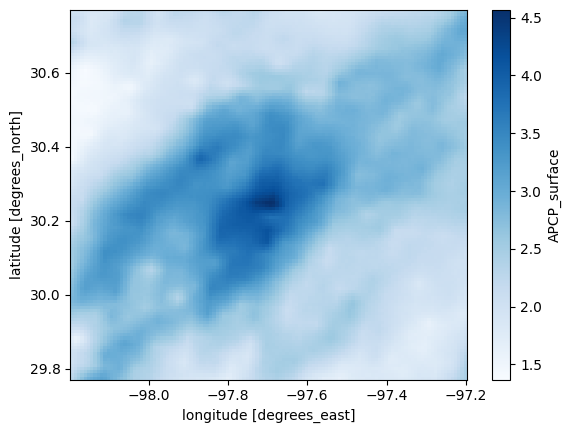

In [ ]:
#ds_apcp_daily.to_netcdf('/content/drive/MyDrive/junk.nc')
ds_apcp_daily.mean(dim='time').plot(cmap='Blues')

In [ ]:
# Assuming the target dataset has coordinates 'lat' and 'lon'
ds_gefs = xr.open_dataset('/content/drive/MyDrive/GEFSv12.25_2017100100.nc')
ds_apcp_daily['longitude'] = (ds_apcp_daily['longitude'] + 360) % 360
ds_apcp_daily_gefs = ds_apcp_daily.interp(latitude=ds_gefs['lat'], longitude=ds_gefs['lon'])

In [ ]:
ds_apcp_daily_gefs.to_netcdf('test.nc')

In [ ]:
ds_test = xr.open_dataset('test.nc')
ds_test

<xarray.Dataset> Size: 27MB
Dimensions:       (lon: 441, lat: 241, time: 32)
Coordinates:
    longitude     (lon) float64 4kB ...
  * lon           (lon) float64 4kB 190.0 190.2 190.5 ... 299.5 299.8 300.0
    latitude      (lat) float64 2kB ...
  * lat           (lat) float64 2kB 15.0 15.25 15.5 15.75 ... 74.5 74.75 75.0
  * time          (time) datetime64[ns] 256B 2017-01-01 ... 2017-02-01
Data variables:
    APCP_surface  (time, lat, lon) float64 27MB ...

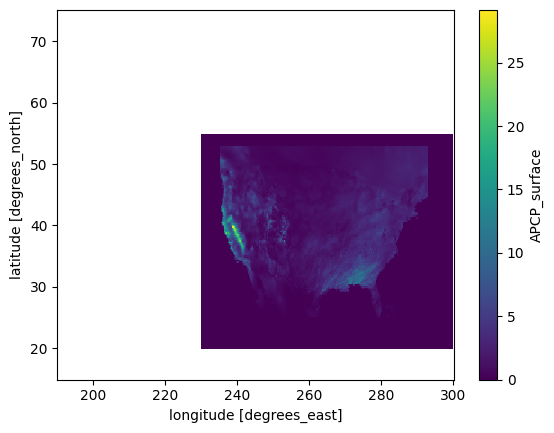

In [ ]:
ds_test.APCP_surface.mean(dim='time').plot()

In [ ]:
print(ds_gefs.lat.values, ds_gefs.lon.values)

[15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75
 21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75
 24.   24.25 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75
 27.   27.25 27.5  27.75 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75
 30.   30.25 30.5  30.75 31.   31.25 31.5  31.75 32.   32.25 32.5  32.75
 33.   33.25 33.5  33.75 34.   34.25 34.5  34.75 35.   35.25 35.5  35.75
 36.   36.25 36.5  36.75 37.   37.25 37.5  37.75 38.   38.25 38.5  38.75
 39.   39.25 39.5  39.75 40.   40.25 40.5  40.75 41.   41.25 41.5  41.75
 42.   42.25 42.5  42.75 43.   43.25 43.5  43.75 44.   44.25 44.5  44.75
 45.   45.25 45.5  45.75 46.   46.25 46.5  46.75 47.   47.25 47.5  47.75
 48.   48.25 48.5  48.75 49.   49.25 49.5  49.75 50.   50.25 50.5  50.75
 51.   51.25 51.5  51.75 52.   52.25 52.5  52.75 53.   53.25 53.5  53.75
 54.   54.25 54.5  54.75 55.   55.25 55.5  55.75 56

In [ ]:
print(ds_apcp_daily.longitude.values)

[-130.       -129.991667 -129.983334 ...  -60.019466  -60.011133
  -60.0028  ]


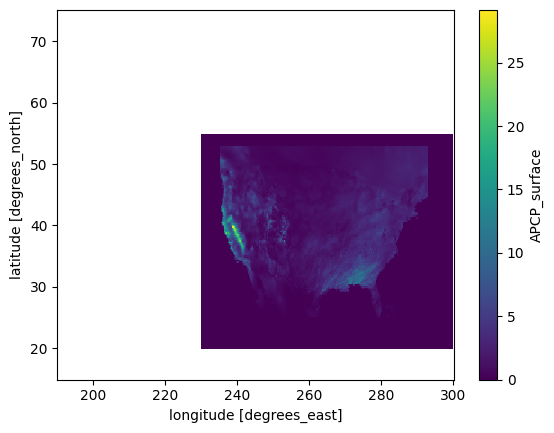

In [ ]:
ds_apcp_daily_gefs.mean(dim='time').plot()

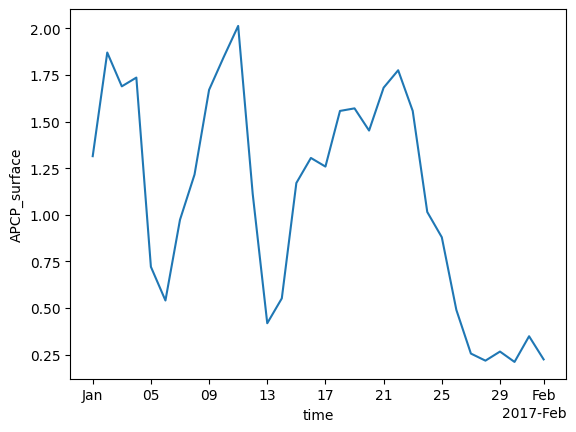

In [ ]:
ds_apcp_daily_gefs.mean(dim='lat').mean(dim='lon').plot()

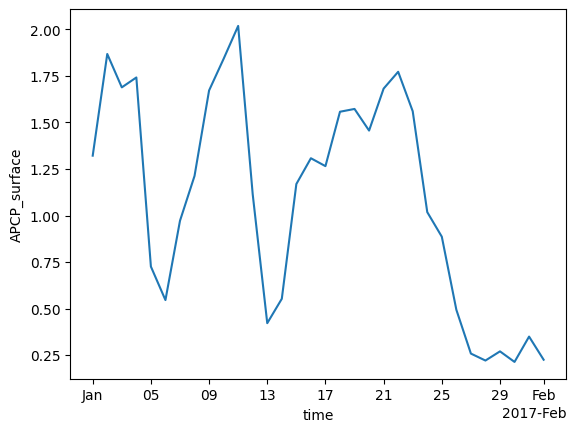

In [ ]:
ds_apcp_daily.mean(dim='latitude').mean(dim='longitude').plot()

INFO:distributed.core:Event loop was unresponsive in Scheduler for 9.25s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 9.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 8.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 8.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


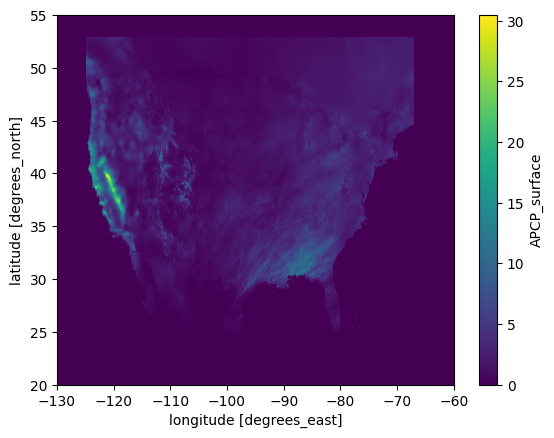

In [ ]:
ds_apcp_daily.mean(dim='time').plot()

In [ ]:
path = '/content/drive/MyDrive/'

import xarray as xr
import fsspec
from dask.distributed import Client

# Initialize the Dask client
client = Client()

# Define the base URL and year
base_url = 's3://noaa-nws-aorc-v1-1-1km'
year = '2017'
single_year_url = f'{base_url}/{year}.zarr/'

# Load the dataset
ds_single = xr.open_zarr(fsspec.get_mapper(single_year_url, anon=True), consolidated=True)

ds_apcp = ds_single['APCP_surface'].sel(time=slice(year+'-01-01', year+'-01-31'))

ds_apcp_daily = ds_apcp.resample(time='1D').sum().compute()

ds_gefs = xr.open_dataset(path + 'GEFSv12.25_2017100100.nc')
ds_apcp_daily['longitude'] = (ds_apcp_daily['longitude'] + 360) % 360
ds_apcp_daily_gefs = ds_apcp_daily.interp(latitude=ds_gefs['lat'], longitude=ds_gefs['lon'])

ds_apcp_daily_gefs.to_netcdf(path+'pr_noaa_aorc_2017_01.nc')

In [ ]:
!mkdir /content/drive/MyDrive/noaa_aorc

In [ ]:
path = '/content/drive/MyDrive/noaa_aorc/'

import xarray as xr
import fsspec
from dask.distributed import Client
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

# Initialize the Dask client
client = Client()

# Define the base URL
base_url = 's3://noaa-nws-aorc-v1-1-1km'

# Define the range of years and months
years = range(2017, 2020)
months = range(1, 13)

for year in years:
    for month in months:
        # Format year and month
        year_str = str(year)
        month_str = f'{month:02d}'

        # Create URL and load dataset
        single_year_url = f'{base_url}/{year_str}.zarr/'
        ds_single = xr.open_zarr(fsspec.get_mapper(single_year_url, anon=True), consolidated=True)

        # Select data for the specific month
        start_date = f'{year_str}-{month_str}-01'
        end_date = pd.to_datetime(start_date) + pd.DateOffset(months=1) - pd.DateOffset(hours=1)
        ds_apcp = ds_single['APCP_surface'].sel(time=slice(start_date, end_date.strftime('%Y-%m-%d')))
        # print(start_date, end_date)
        # Display the dataset
        # print(ds_apcp)
        # print('Year: ',year, 'month: ',month)
        # Resample to daily data
        ds_apcp_daily = ds_apcp.resample(time='1D').sum().compute()
        ds_apcp_daily.to_netcdf(path+f'pr_noaa_aorc_1km_{year_str}_{month_str}.nc')
        # Load GEFS dataset for interpolation
        gefs_file = f'/content/drive/MyDrive/GEFSv12.25_2017100100.nc'
        ds_gefs = xr.open_dataset(gefs_file)
        ds_apcp_daily['longitude'] = (ds_apcp_daily['longitude'] + 360) % 360
        ds_apcp_daily_gefs = ds_apcp_daily.interp(latitude=ds_gefs['lat'], longitude=ds_gefs['lon'])

        # Save to netCDF file
        output_file = path+f'pr_noaa_aorc_{year_str}_{month_str}.nc'
        ds_apcp_daily_gefs.to_netcdf(output_file)

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:36127
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34079'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35413'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34139'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37659'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:35151', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35151
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43286
INFO:distributed.scheduler:Regist

In [ ]:
!ls

drive  sample_data


In [ ]:
ds = xr.open_dataset('pr_noaa_aorc_2017_01.nc')
ds

<xarray.Dataset> Size: 26MB
Dimensions:       (time: 31, lat: 241, lon: 441)
Coordinates:
  * time          (time) datetime64[ns] 248B 2017-01-01 ... 2017-01-31
    latitude      (lat) float64 2kB ...
    longitude     (lon) float64 4kB ...
  * lat           (lat) float64 2kB 15.0 15.25 15.5 15.75 ... 74.5 74.75 75.0
  * lon           (lon) float64 4kB 190.0 190.2 190.5 ... 299.5 299.8 300.0
Data variables:
    APCP_surface  (time, lat, lon) float64 26MB ...